# TextRank

In [1]:
import numpy as np
import pandas as pd
import config
import jupyter_service
import sys
import matplotlib.pyplot as plt
from dbcontext import Context
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.display.float_format = '{:.2f}'.format
print(sys.version, np.__version__, pd.__version__, config.version)
context = Context()
context.create(echo=False)
service = jupyter_service.JupyterService(context)
nb_form=15854
print(config.connection_string)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)] 2.0.2 2.2.3 0.1.0.Alpha
postgresql://postgres:sa@localhost:5432/yt1


In [2]:
question_nb=12
mode="textrank"

Most used topics

In [3]:
df = service.get_topics(mode, question_nb)
nb_topic = len(df)
df

,topic,nb_form
0,peace,2898
1,world,2039
2,countries,2026
3,life,1702
4,good,1517
...,...,...
851,hollywood,2
852,tanti,2
853,lebanon,2
854,inegalities,2


Stats

In [4]:
df = service.get_stats(mode)
avg=df.iloc[0].average
median=df.iloc[0].median_
percentile=df.iloc[0].percentile
df

,average,median_,quartile,decile,percentile
0,57.02,6.00,3.00,2.00,2.00


Lemas

In [5]:
topic = "peace"
df = service.get_lemas(topic, mode)
df.head(10)


,topic_label,lema_label,count
0,peace,peace,2802
1,peace,world_peace,350
2,peace,peaceful,209
3,peace,more_peace,37
4,peace,inner_peace,25
5,peace,quiet,21
6,peace,secure,16
7,peace,peacefull,16
8,peace,serenity,14
9,peace,more_peaceful,13


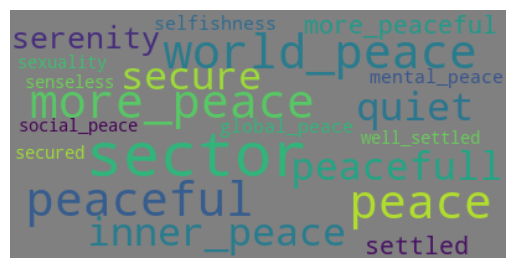

In [6]:
service.show_lemas(df)

Empathy Positive Score

In [7]:
empathy_category="pd"
df = service.get_scores(mode, question_nb, empathy_category, positive=True, denominator_thresold=median, numerator_thresold=avg, debug=False)
print(f"{empathy_category} positive score")
df.head(10)

pd positive score


,id,topic,nb_positive_form,nb_negative_form,score
0,5987,better,357,226,1.58
1,5997,dreams,62,40,1.55
2,6036,person,151,100,1.51
3,5962,everyone,125,84,1.49
4,6005,future,127,96,1.32
5,5998,world,549,435,1.26
6,5972,others,127,104,1.22
7,5971,harmony,60,50,1.20
8,5957,stable,58,49,1.18
9,6018,work,97,82,1.18


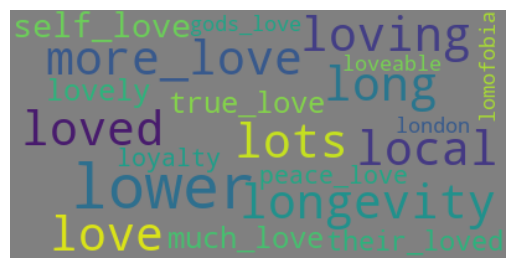

In [8]:
topic = "love"
df = service.get_lemas(topic, mode)
service.show_lemas(df)

In [9]:
empathy_category="empathy"
df = service.get_scores(mode, question_nb, empathy_category, positive=False, denominator_thresold=median, numerator_thresold=avg-8)
df.head(10)


,id,topic,nb_negative_form,nb_positive_form,score
0,5955,countries,50,939,0.05
1,5980,peace,52,1344,0.04


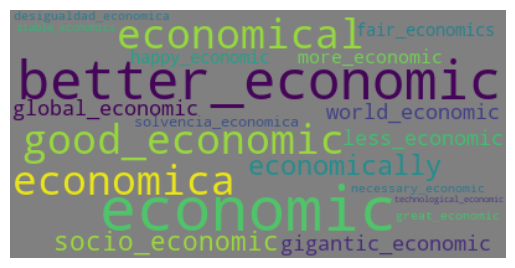

In [10]:
topic = "economic"
df = service.get_lemas(topic, mode)
service.show_lemas(df)

Low Noise


In [25]:
empathy_category="empathy"
df = service.get_scores(mode, question_nb, empathy_category, positive=False, denominator_thresold=percentile, numerator_thresold=median)
df=df[df.score>0.5]
print(f"Low noise {empathy_category} negative score")
df.head(10)

Low noise empathy negative score


,id,topic,nb_negative_form,nb_positive_form,score
0,6059,nothing,7,7,1.00


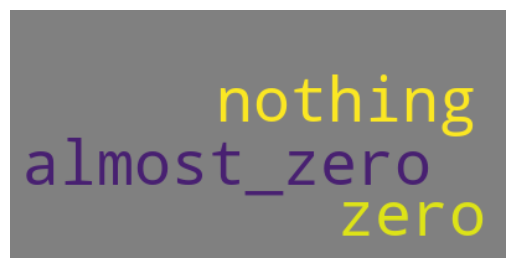

In [21]:
topic = "nothing"
df = service.get_lemas(topic, mode)
service.show_lemas(df)

In [26]:
df = service.get_scores(mode, question_nb, empathy_category, positive=True, denominator_thresold=percentile, numerator_thresold=median)
df=df[df.score>0.5]
print(f"Low noise {empathy_category} positive score")
df.head(10)

Low noise empathy positive score


,id,topic,nb_positive_form,nb_negative_form,score
0,5961,happy,201,4,50.25
1,6101,safety,133,3,44.33
2,6178,unity,169,4,42.25
3,6072,love,375,9,41.67
4,6161,social,124,3,41.33
5,6018,work,160,4,40.00
6,6048,happiness,630,18,35.00
7,6049,health,508,16,31.75
8,6007,warming,284,9,31.56
9,6011,change,218,7,31.14


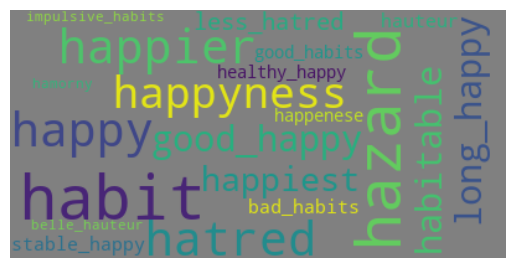

In [27]:
topic = "happy"
df = service.get_lemas(topic, mode)
service.show_lemas(df)